In [8]:
%matplotlib inline
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [9]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [10]:
train_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [11]:
train_df[train_df.isnull() == False].columns

Index([u'portfolio_id', u'desk_id', u'office_id', u'pf_category',
       u'start_date', u'sold', u'country_code', u'euribor_rate', u'currency',
       u'libor_rate', u'bought', u'creation_date', u'indicator_code',
       u'sell_date', u'type', u'hedge_value', u'status', u'return'],
      dtype='object')

In [12]:
total_counts = train_df.count()
total_counts.sort_values()

hedge_value       3665
indicator_code    3667
desk_id           5701
status            6282
libor_rate        8892
sold              9364
bought            9364
portfolio_id      9366
type              9366
sell_date         9366
creation_date     9366
currency          9366
country_code      9366
start_date        9366
pf_category       9366
office_id         9366
euribor_rate      9366
return            9366
dtype: int64

In [13]:
train_df['hedge_value'][train_df['hedge_value'].isnull()==False].count()

3665

In [14]:
sold              9364
bought            9364
portfolio_id      9366
type              9366
sell_date         9366
creation_date     9366
currency          9366
country_code      9366
start_date        9366
pf_category       9366
office_id         9366
euribor_rate      9366
return            9366

SyntaxError: invalid syntax (<ipython-input-14-416ec8e73135>, line 1)

In [15]:
train_df.sold[train_df.sold.isnull() == True]

572   NaN
573   NaN
Name: sold, dtype: float64

In [16]:
train_df.bought[train_df.bought.isnull() == True]

572   NaN
573   NaN
Name: bought, dtype: float64

In [17]:
train_df.bought[572] = train_df.bought[:571].mean()
train_df.bought[573] = train_df.bought[575]

C:\Users\kislay\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\kislay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
train_df.bought[train_df.bought.isnull() == True]

Series([], Name: bought, dtype: float64)

In [19]:
train_df.sold[572] = 1.392775e+08
train_df.sold[573] = train_df.sold[575]


C:\Users\kislay\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\kislay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
train_df.sold[train_df.sold.isnull() == True]

Series([], Name: sold, dtype: float64)

In [21]:
max_sold = train_df.sold.max()
min_sold = train_df.sold.min()
var_sold = train_df.sold.var()
print(max_sold,min_sold,var_sold)

(13200000000.0, 1.1000000000000001, 3.716681153140056e+16)


In [22]:
train_df[['currency','bought','sold']][:5]

,currency,bought,sold
0,USD,1.098097e+08,110000000.0
1,GBP,1.760084e+08,176671000.0
2,USD,5.637953e+07,56474000.0
3,USD,1.645088e+08,164813000.0
4,USD,1.405402e+08,140800000.0


In [23]:
train_df.currency.unique()

array(['USD', 'GBP', 'CHF', 'EUR', 'JPY'], dtype=object)

In [24]:
profit = train_df.sold[train_df.currency == 'USD'] - train_df.bought[train_df.currency == 'USD']  

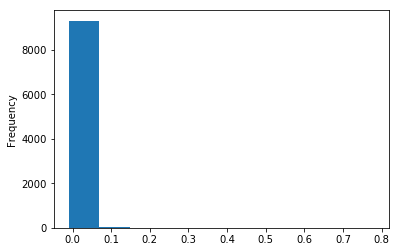

In [25]:
train_df['return'].plot(kind='hist')

In [26]:
np.correlate(train_df['bought'],train_df['return'])

array([  1.66613926e+10])

In [27]:
from sklearn import preprocessing

In [28]:
mean_sold = train_df.sold.mean()
std_sold = np.std(train_df.sold)
mean_bought = np.mean(train_df.bought)
std_bought = np.std(train_df.bought)

In [29]:
df_sold = (train_df.sold - mean_sold)/std_sold
df_bought = (train_df.bought - mean_bought)/std_bought

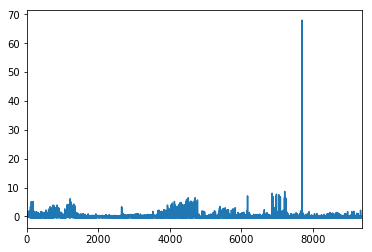

In [30]:
df_bought.plot()

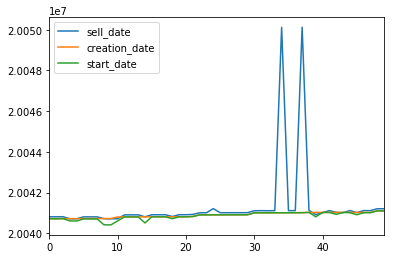

In [31]:
train_df[['sell_date','creation_date','start_date']][:50].plot(kind='line')

In [32]:
tem1 = train_df.creation_date - train_df.start_date
tem2 = train_df.sell_date - train_df.start_date

In [33]:
tem3 = (tem1+tem2)**2
tem3_n = (tem3 - tem3.mean())/np.std(tem3)


In [37]:
print(df_start.corr(train_df['return']))
print(df_sell.corr(train_df['return']))
print(df_creation.corr(train_df['return']))
print(tem2.corr(train_df['return']))
print(train_df.start_date.corr(train_df['return']))
print(train_df.sell_date.corr(train_df['return']))
print(train_df.creation_date.corr(train_df['return']))

-0.504294935976
-0.503353484869
-0.504260505488
-0.00504750980755
-0.504294935976
-0.503353484869
-0.504260505488


# Label Encoders

In [38]:
df_creation = (train_df.creation_date - train_df.creation_date.mean())/np.std(train_df.creation_date)
df_sell = (train_df.sell_date - train_df.sell_date.mean())/np.std(train_df.sell_date)
df_start = (train_df.start_date - train_df.start_date.mean())/np.std(train_df.start_date)

In [39]:
train_df.indicator_code.fillna(False,inplace=True)


In [40]:
enc_indicator = preprocessing.LabelEncoder()

In [41]:
enc_indicator.fit([False,  True])
df_indicator = enc_indicator.transform(train_df.indicator_code)

In [42]:
train_df.libor_rate.fillna(train_df['libor_rate'].mean(), inplace=True)

In [43]:
libor_mean = train_df.libor_rate.mean()
libor_std = np.std(train_df.libor_rate)
df_libor = (train_df.libor_rate - libor_mean)/libor_std
    

In [44]:
df_libor.count()

9366

In [45]:
train_df.status.fillna(False,inplace=True)
train_df.status.unique()

array([False,  True], dtype=bool)

In [46]:
enc_status = preprocessing.LabelEncoder()
enc_status.fit([False,  True])

LabelEncoder()

In [47]:
df_status = enc_status.transform(train_df.status)

In [48]:
train_df.hedge_value.fillna(method='bfill',inplace = True)

In [49]:
enc_hedge = preprocessing.LabelEncoder()
train_df.hedge_value.unique()

array([ True, False], dtype=bool)

In [50]:
enc_hedge.fit([True, False])
df_hedge = enc_hedge.transform(train_df.hedge_value)

In [51]:
enc = preprocessing.LabelEncoder()

In [52]:
#enc.fit(train_df['currency'])  
enc.fit(["USD","GBP","CHF","EUR", "JPY"])  



LabelEncoder()

In [53]:
df_currency = enc.transform(train_df['currency'])

In [54]:
df_return = train_df['return']

In [55]:
train_df.pf_category.unique()

array(['B', 'A', 'C', 'D', 'E'], dtype=object)

In [56]:
enc_pf = preprocessing.LabelEncoder()
enc_pf.fit(['B', 'A', 'C', 'D', 'E'])

LabelEncoder()

In [57]:
df_pf = enc_pf.transform(train_df.pf_category)

In [58]:
train_df.type.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [59]:
enc_type = preprocessing.LabelEncoder()

In [60]:
enc_type.fit(['B', 'C', 'A', 'D', 'E', 'F', 'G', 'H'])
df_type = enc_type.transform(train_df.type)

In [61]:
enc_country_code = preprocessing.LabelEncoder()

In [62]:
train_df.country_code.unique()

array(['T', 'N', 'M', 'Z', 'U'], dtype=object)

In [63]:
enc_country_code.fit(['T', 'N', 'M', 'Z', 'U'])
df_country_code = enc_country_code.transform(train_df.country_code)

In [64]:
df_euribor = train_df.euribor_rate

In [65]:
df_profit = (df_sold-df_bought)**2

In [66]:
df = pd.DataFrame({'start':df_start,'creation':df_creation,'sell':df_sell,'indicator':df_indicator,'profit':df_profit,'status':df_status,'sold':df_sold,'bought':df_bought,'currency':df_currency,'euribor':df_euribor,'libor':df_libor,'pf':df_pf,'hedge':df_hedge,'type':df_type,'country_code':df_country_code ,'return':df_return})

In [67]:
 df.corr()['return'].sort_values()

status         -0.628951
start          -0.504295
creation       -0.504261
sell           -0.503353
indicator      -0.405902
type           -0.201983
pf             -0.106810
bought          0.086402
sold            0.086987
profit          0.200542
currency        0.231778
hedge           0.308904
country_code    0.526355
libor           0.592318
euribor         0.648551
return          1.000000
Name: return, dtype: float64

## Test Train Split

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [69]:
target = df['return']
X_train, X_valid, y_train, y_valid = train_test_split(df, target, train_size = 0.7)

## Features

In [112]:
#feature_names = ['profit','currency','euribor','libor','country_code','hedge','status','indicator','type','pf','start','sell','creation']
neg_feature_names = ['status','indicator','type','pf','start','sell','creation']
X = df[feature_names]
feature_names = ['profit','start','sell','euribor','libor']

In [113]:
df.count()

bought          9366
country_code    9366
creation        9366
currency        9366
euribor         9366
hedge           9366
indicator       9366
libor           9366
pf              9366
profit          9366
return          9366
sell            9366
sold            9366
start           9366
status          9366
type            9366
dtype: int64

#  Linearregression Model

In [114]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train[feature_names],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
pred1 =  regr.predict(X_valid[feature_names])

In [116]:
pred1 = regr.predict(X_valid[feature_names])

In [117]:
from sklearn.metrics import explained_variance_score

In [118]:
explained_variance_score(y_valid, pred1)  

0.51062868988744925

In [119]:
from sklearn.metrics import r2_score
r2_score(y_valid, pred1) 

0.51055790522181432

In [78]:
sub = pd.read_csv('sample_submission.csv')

In [79]:
def create_df(train_df):
    #indicator
    train_df.indicator_code.fillna(False,inplace=True)
    df_indicator = enc_indicator.transform(train_df.indicator_code)
    #dates
    df_creation = (train_df.creation_date - train_df.creation_date.mean())/np.std(train_df.creation_date)
    df_sell = (train_df.sell_date - train_df.sell_date.mean())/np.std(train_df.sell_date)
    df_start = (train_df.start_date - train_df.start_date.mean())/np.std(train_df.start_date)
    #libor_rate
    train_df.libor_rate.fillna(train_df['libor_rate'].mean(), inplace=True)
    libor_mean = train_df.libor_rate.mean()
    libor_std = np.std(train_df.libor_rate)
    df_libor = (train_df.libor_rate - libor_mean)/libor_std
    #hedge_value
    train_df.hedge_value.fillna(method='bfill',inplace = True)
    df_hedge = enc_hedge.transform(train_df.hedge_value)
    
    #status
    train_df.status.fillna(False,inplace=True)
    df_status = enc_status.transform(train_df.status)
    
    mean_sold = train_df.sold.mean()
    std_sold = np.std(train_df.sold)
    mean_bought = np.mean(train_df.bought)
    std_bought = np.std(train_df.bought)
    df_sold = (train_df.sold - mean_sold)/std_sold
    df_bought = (train_df.bought - mean_bought)/std_bought
    df_currency = enc.transform(train_df['currency'])
    df_pf = enc_pf.transform(train_df.pf_category)
    df_type = enc_type.transform(train_df.type)
    df_euribor = train_df.euribor_rate
    df_country_code = enc_country_code.transform(train_df.country_code)
    #profit
    df_profit = (df_sold-df_bought)**2
    
    df = pd.DataFrame({'start':df_start,'creation':df_creation,'sell':df_sell,'indicator':df_indicator,'profit':df_profit,'status':df_status,'sold':df_sold,'bought':df_bought,'currency':df_currency,'euribor':df_euribor,'libor':df_libor,'hedge':df_hedge,'pf':df_pf,'type':df_type,'country_code':df_country_code })
    return df

# Creating Test Data

In [80]:
df_test = create_df(test_df)

In [ ]:
y_sub = regr.predict(df_test[feature_names])

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['return'] = y_sub
sub['return'] = sub['return']
sub.to_csv('sub2.csv', index=False)

In [ ]:
train_df.corr()['return'].sort_values()

In [ ]:
df[df.isnull()==True].count()

In [ ]:
test_df.count()

In [ ]:
df_libor.count()

# Gradient Boost regression Model

In [120]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle

In [144]:
params = {'n_estimators': 900, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train[feature_names], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=900,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [145]:
pred2 = clf.predict(X_valid[feature_names])

In [146]:
r2_score(y_valid, pred2)

0.91752956284593357

In [139]:
pred_sub_gb = clf.predict(df_test[feature_names])

In [140]:
sub = pd.read_csv('sample_submission.csv')
sub['return'] = pred_sub_gb
sub['return'] = sub['return']
sub.to_csv('sub9.csv', index=False)

# RandomForest

In [134]:
from sklearn.ensemble import RandomForestRegressor
clfRadomForest = RandomForestRegressor(max_depth=8, random_state=0,n_estimators=400)
clfRadomForest.fit(X_train[feature_names], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [135]:
pred3 = clfRadomForest.predict(X_valid[feature_names])
r2_score(y_valid, pred3)

0.93827586833487875

# SVM Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [ ]:
#y_rbf = svr_rbf.fit(X_train[feature_names], y_train).predict(X_valid[feature_names])
y_lin = svr_lin.fit(X_train[feature_names], y_train).predict(X_valid[feature_names])
#y_poly = svr_poly.fit(X_train[feature_names], y_train).predict(X_valid[feature_names])

In [ ]:
r2_score(y_valid, y_rbf)

In [ ]:
r2_score(y_valid, y_lin)

In [ ]:
r2_score(y_valid, y_poly)

#  Ada Boost Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=10)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=1000, random_state=rng)

In [ ]:
regr_1.fit(X_train[feature_names], y_train)
regr_2.fit(X_train[feature_names], y_train)

In [ ]:
y_1 = regr_1.predict(X_valid[feature_names])
y_2 = regr_2.predict(X_valid[feature_names])


In [ ]:
r2_score(y_valid, y_1)

In [ ]:
r2_score(y_valid,y_2)

In [ ]:
predTree = regr_1.predict(df_test[feature_names])
predAda = regr_2.predict(df_test[feature_names])

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['return'] = predAda
sub['return'] = sub['return']
sub.to_csv('sub6.csv', index=False)

#  Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [ ]:
#kfold = KFold(n_splits=10, random_state=seed)
#estimator.fit(X_train[feature_names],y_train)

In [ ]:
for feature in neg_feature_names+feature_names:
    regr = linear_model.LinearRegression()
    regr.fit(X_train[[feature]],y_train)
    cvs = cross_val_score(regr,X_valid[[feature]],y_valid)
    print(feature,cvs.mean(),cvs.std())
    

# XG boost


In [83]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [ ]:
#clfXgb = XGBRegressor(max_depth=1000000,learning_rate=0.01,n_estimators=100000)

In [ ]:
#clfXgb.fit(X_train[feature_names],y_train)

In [ ]:
predXgb = clfXgb.predict(X_valid[feature_names])

In [ ]:
r2_score(y_valid,predXgb)

In [84]:
xgb2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [85]:
xgb2.fit(X_train[feature_names],y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [87]:
predXgb2 = xgb2.predict(X_valid[feature_names])

In [88]:
r2_score(y_valid,predXgb2)

0.94689546188825147

In [ ]:
pred_sub_xgb2 = clfXgb.predict(df_test[feature_names])

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['return'] = pred_sub_xgb2
sub['return'] = sub['return']
sub.to_csv('sub7.csv', index=False)

In [89]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors], label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
   
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % r2_score(y_train, dtrain_predictions)
    
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9985


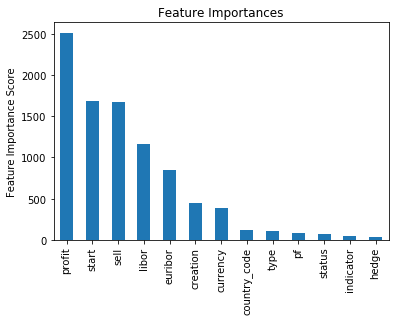

In [90]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_train, feature_names)

In [91]:
predXgb1 = xgb1.predict(X_valid[feature_names])

In [92]:
r2_score(y_valid,predXgb1)

0.8588652852371359